In [28]:
import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage

In [ ]:
plt.figure(figsize=(100,100))
plt.subplot(151)
plt.imshow(cv2.cvtColor(cv2.imread("cmpe-building/left-2.jpg"),cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.subplot(152)
plt.imshow(cv2.cvtColor(cv2.imread("cmpe-building/left-1.jpg"),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(153)
plt.imshow(cv2.cvtColor(cv2.imread("cmpe-building/middle.jpg"),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(154)
plt.imshow(cv2.cvtColor(cv2.imread("cmpe-building/right-1.jpg"),cv2.COLOR_BGR2RGB))
plt.axis('off')            
plt.subplot(155)
plt.imshow(cv2.cvtColor(cv2.imread("cmpe-building/right-2.jpg"),cv2.COLOR_BGR2RGB))
plt.axis('off')            
plt.show()


NameError: name 'points_left' is not defined

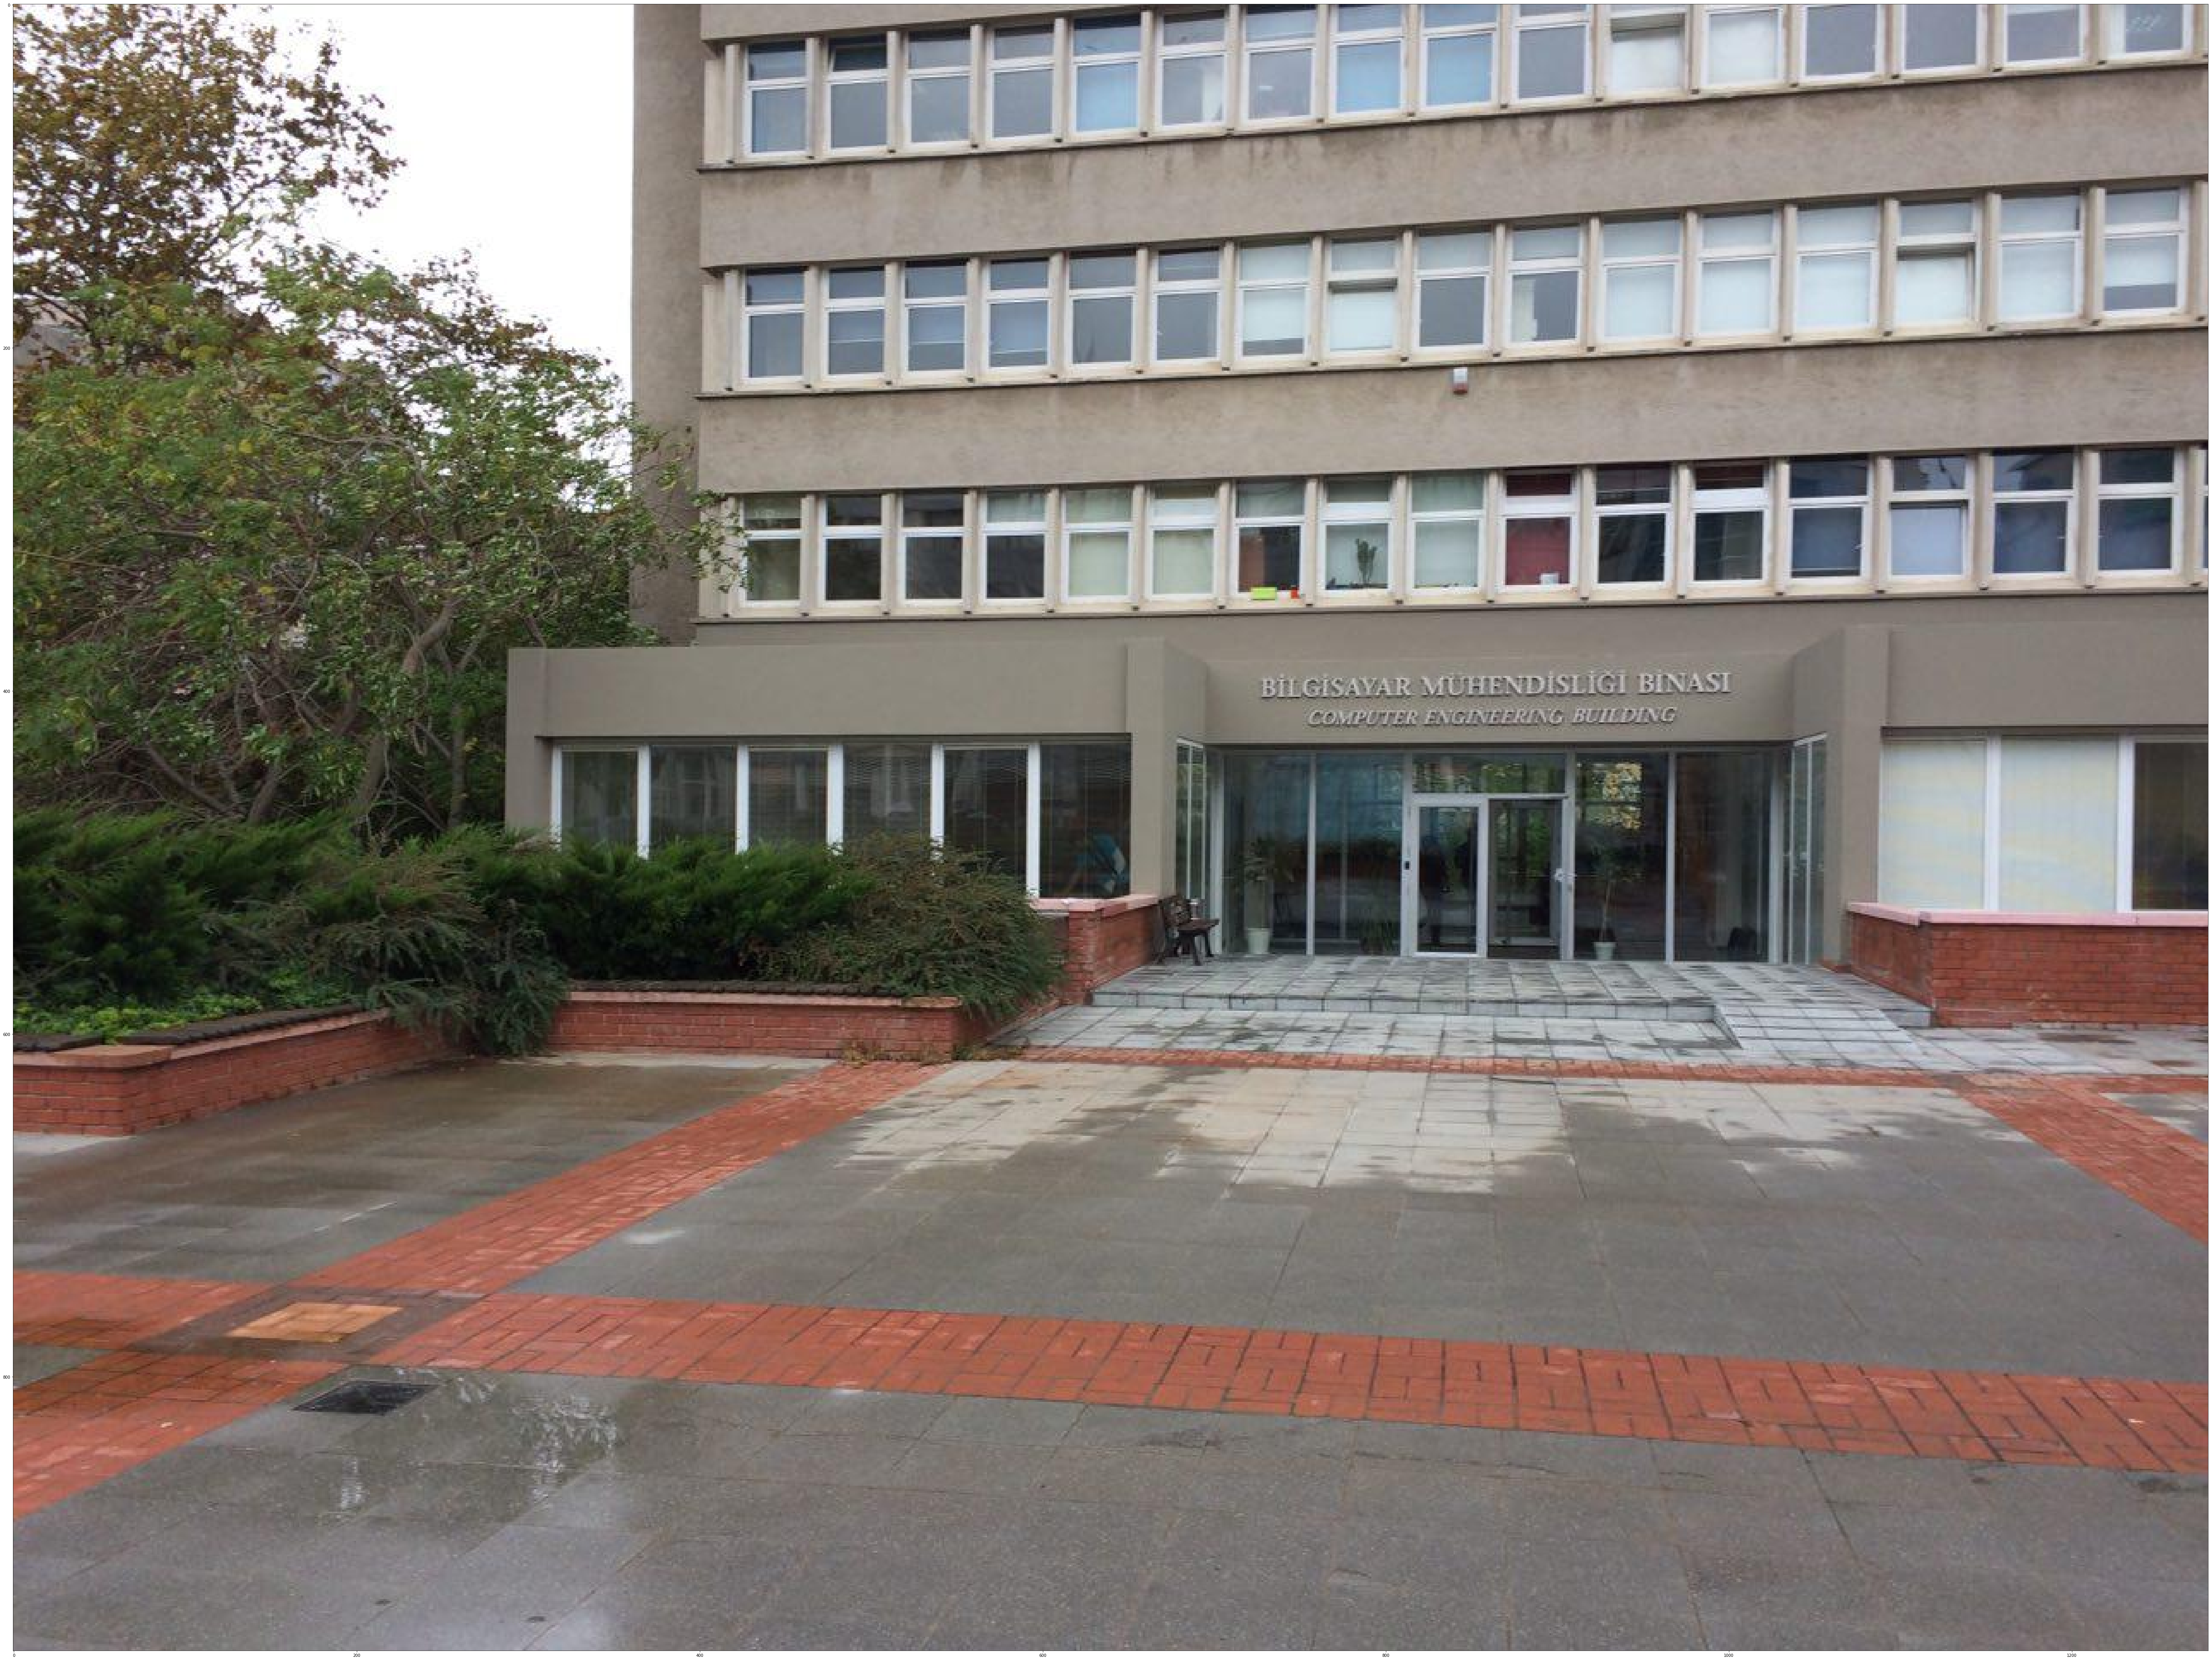

In [2]:
plt.figure(figsize=(100,100))
image_left=cv2.cvtColor(cv2.imread("cmpe-building/left-2.jpg"),cv2.COLOR_BGR2RGB)
plt.imshow(image_left)
# points_left = np.array(plt.ginput(5))
# plt.axis('off')
image_right=cv2.cvtColor(cv2.imread("cmpe-building/left-1.jpg"),cv2.COLOR_BGR2RGB)
plt.imshow(image_right)
# points_right = np.array(plt.ginput(5))
# plt.axis('off')

print(points_left)
print(points_right)

In [35]:
points_left=np.load("left-1.npz.npy")
points_right=np.load("left-2.npz.npy")
# points_left=np.array([[ 970.44746163,  396],
#  [ 998.78276269  ,397],
#  [1071.98229044  ,400],
#  [1220.74262102  ,396],
#  [ 999.96340024  ,417]])
# points_right=np.array([[733.13931523 ,396],
#  [760.29397875 ,397],
#  [831.1322314  ,400],
#  [951.55726092 ,396],
#  [762.65525384 ,417]])

In [36]:
points_left.shape

(926, 2)

In [37]:
points_right.shape

(830, 2)

In [5]:


def get_normalization_matrix(pts, name="A"):
    pts = pts.astype(np.float64)
    x_mean, y_mean = np.mean(pts, axis=0)
    var_x, var_y = np.var(pts, axis=0)

    s_x , s_y = np.sqrt(2/var_x), np.sqrt(2/var_y)

    print("Matrix: {4} : meanx {0}, meany {1}, varx {2}, vary {3}, sx {5}, sy {6} ".format(x_mean, y_mean, var_x, var_y, name, s_x, s_y))

    n = np.array([[s_x, 0, -s_x*x_mean], [0, s_y, -s_y*y_mean], [0, 0, 1]])
    # print(n)

    n_inv = np.array([ [1./s_x ,  0 , x_mean], [0, 1./s_y, y_mean] , [0, 0, 1] ])
    return n.astype(np.float64), n_inv.astype(np.float64)

get_normalization_matrix(points_left)
  

Matrix: A : meanx 1052.383707204, meany 401.2, varx 8212.665299983482, vary 64.56, sx 0.015605329242729985, sy 0.1760083359521907 


(array([[ 1.56053292e-02,  0.00000000e+00, -1.64227942e+01],
        [ 0.00000000e+00,  1.76008336e-01, -7.06145444e+01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 array([[6.40806730e+01, 0.00000000e+00, 1.05238371e+03],
        [0.00000000e+00, 5.68154908e+00, 4.01200000e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]))

In [19]:
centroids_left=np.mean(points_left,axis=0)
k_left=len(points_left)*np.sqrt(2)/(np.sum(np.sqrt(np.sum(np.square(points_left-centroids_left),axis=1))))
centroids_right=np.mean(points_right,axis=0)
k_right=len(points_right)*np.sqrt(2)/(np.sum(np.sqrt(np.sum(np.square(points_right-centroids_right),axis=1))))

In [28]:
A=np.zeros(shape=(2*len(points_left),9))

array([[  2.5296285,  83.260284 ],
       [  2.6920264, 118.05745  ],
       [  3.1361332, 220.2484   ],
       ...,
       [394.0701   , 199.72342  ],
       [394.07114  ,  54.99853  ],
       [394.39786  , 100.71953  ]], dtype=float32)

In [33]:
[(206, 1), (210, 4), (241, 5), (243, 6), (246, 8), (247, 9), (264, 17), (257, 18), (260, 20), (263, 23), (282, 25), (269, 30), (271, 31), (415, 32), (275, 37), (276, 38), (801, 43), (243, 47), (285, 49), (286, 50), (287, 51), (288, 52), (289, 53), (303, 54), (289, 55), (297, 56), (296, 57), (301, 58), (257, 62), (304, 63), (305, 64), (302, 65), (306, 68), (308, 71), (309, 72), (311, 73), (315, 74), (321, 76), (317, 79), (319, 80), (316, 81), (325, 87), (326, 88), (327, 89), (654, 90), (334, 92), (328, 93), (338, 101), (337, 104), (491, 105), (341, 106), (339, 108), (340, 109), (344, 110), (346, 114), (348, 115), (691, 116), (352, 120), (353, 121), (358, 129), (372, 136), (377, 137), (373, 138), (375, 140), (380, 141), (390, 142), (389, 148), (391, 150), (396, 152), (397, 155), (398, 156), (402, 157), (399, 158), (395, 159), (406, 160), (404, 163), (411, 166), (416, 170), (585, 171), (422, 174), (423, 175), (424, 176), (427, 180), (432, 182), (434, 183), (426, 184), (430, 189), (431, 190), (433, 191), (443, 194), (444, 195), (440, 196), (451, 200), (449, 202), (575, 206), (465, 209), (457, 210), (458, 211), (455, 212), (468, 215), (456, 216), (463, 219), (466, 220), (467, 221), (469, 225), (470, 226), (471, 227), (472, 228), (473, 229), (474, 230), (476, 231), (475, 232), (477, 233), (483, 238), (484, 239), (480, 240), (486, 241), (485, 243), (489, 245), (487, 246), (490, 249), (492, 251), (493, 252), (491, 253), (497, 256), (495, 257), (510, 260), (502, 261), (501, 263), (504, 264), (503, 265), (509, 266), (512, 267), (511, 269), (518, 270), (516, 277), (517, 278), (519, 282), (521, 283), (522, 285), (526, 286), (532, 287), (537, 290), (535, 292), (533, 293), (542, 295), (539, 296), (544, 298), (540, 300), (551, 304), (546, 305), (545, 306), (564, 309), (542, 311), (559, 312), (560, 313), (573, 315), (567, 318), (572, 319), (574, 321), (575, 323), (771, 324), (579, 325), (585, 329), (585, 331), (592, 340), (593, 341), (589, 342), (595, 344), (596, 346), (600, 347), (560, 348), (598, 349), (599, 350), (603, 352), (610, 354), (612, 355), (605, 356), (606, 357), (613, 358), (617, 359), (621, 360), (622, 361), (616, 362), (614, 363), (615, 364), (631, 368), (633, 369), (623, 371), (626, 372), (628, 373), (625, 375), (627, 376), (630, 377), (634, 380), (641, 383), (643, 385), (644, 387), (647, 390), (326, 396), (650, 399), (651, 401), (654, 403), (331, 408), (656, 409), (660, 410), (661, 413), (662, 415), (666, 418), (670, 419), (703, 420), (667, 422), (339, 423), (268, 431), (671, 433), (672, 435), (675, 439), (722, 441), (685, 443), (678, 445), (679, 446), (686, 448), (589, 449), (689, 452), (690, 453), (286, 456), (693, 459), (691, 460), (694, 461), (701, 465), (702, 466), (696, 467), (698, 469), (699, 471), (708, 473), (703, 475), (705, 477), (706, 478), (712, 481), (710, 482), (711, 483), (713, 484), (715, 486), (716, 487), (801, 488), (724, 493), (727, 494), (728, 495), (725, 496), (731, 497), (730, 500), (733, 501), (732, 504), (736, 506), (737, 508), (738, 509), (739, 510), (740, 512), (630, 519), (751, 521), (758, 522), (801, 524), (757, 528), (762, 529), (763, 530), (766, 533), (660, 534), (768, 536), (769, 537), (619, 538), (770, 539), (772, 544), (771, 546), (764, 547), (764, 548), (773, 549), (775, 550), (776, 551), (782, 554), (784, 556), (777, 557), (781, 560), (787, 565), (788, 568), (792, 572), (795, 573), (796, 578), (267, 579), (797, 580), (819, 582), (808, 584), (799, 586), (812, 587), (811, 588), (812, 589), (810, 590), (809, 591), (816, 592), (286, 595), (821, 601), (795, 607), (706, 610), (300, 620), (466, 621), (810, 622), (359, 636), (795, 642), (792, 645), (703, 646), (796, 648), (797, 649), (713, 651), (283, 665), (430, 672), (795, 678), (637, 682), (285, 694), (286, 695), (812, 709), (795, 711), (312, 713), (796, 714), (590, 718), (283, 726), (795, 740), (796, 742), (706, 743), (311, 745), (312, 746), (575, 751), (771, 756), (801, 764), (815, 777), (674, 784), (791, 796), (764, 818), (773, 819), (773, 834), (510, 847)]
 
np.array([[ 6.42400324e-01,  1.31354884e-02,  1.28492333e+02],
       [-1.35382356e-01,  8.73367204e-01,  2.02652152e+01],
       [-8.99665951e-04,  7.06079104e-06,  1.00000000e+00]])

SyntaxError: unexpected EOF while parsing (<ipython-input-33-dab9e204fc05>, line 3)

In [38]:
p1=points_left
p2=points_right
A = []
for i in range(0, len(p1)):
    x, y = p1[i][0], p1[i][1]
    u, v = p2[i][0], p2[i][1]
    A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
    A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
A = np.asarray(A)
U, S, Vh = np.linalg.svd(A)
L = Vh[-1,:] / Vh[-1,-1]
H = L.reshape(3, 3)

IndexError: index 830 is out of bounds for axis 0 with size 830

In [30]:
skimage.transform.warp(image_right,H).shape

(960, 1280, 3)

In [ ]:
def computeH(im1Points,im2Points):
    pass

In [ ]:
import numpy as np
np.array(x).T

In [45]:
points_left.T

array([[ 970.44746163,  998.78276269, 1071.98229044, 1220.74262102,
         999.96340024],
       [ 396.52479339,  397.70543093,  400.06670602,  396.52479339,
         416.59563164]])

In [53]:
h_cv2,status=cv2.findHomography(points_right,points_left)

In [54]:
h_cv2

array([[ 6.73699075e-02, -9.97035318e-01,  7.17172924e+02],
       [-1.19999237e-01, -4.40606045e-02,  2.56997622e+02],
       [-3.02755847e-04, -9.98287838e-04,  1.00000000e+00]])

In [ ]:
points_right[1:].dtype

In [6]:
np.float32([[56,65],[368,52],[28,387],[389,390]]).shape
p_l=points_left[1:].astype(np.float32)
p_r=points_right[1:].astype(np.float32)

In [35]:
M = cv2.getPerspectiveTransform(p_r,p_l)


In [ ]:
H

In [ ]:
M

In [35]:
imageA=image_right
imageB=image_left
b=H.copy()

b[0][2]=0
b[1][2]=0
result = cv2.warpPerspective(imageB, H,(imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
result[0:imageB.shape[0], 0:imageB.shape[1]] = imageB

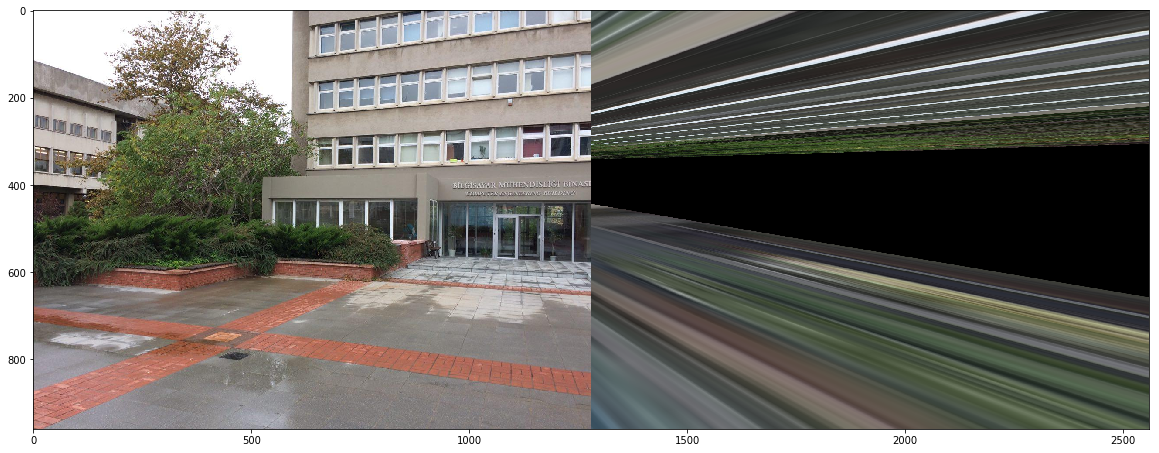

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(result)
plt.show()

In [7]:
im=image_right
# This part will will calculate the X and Y offsets
bunchX=[]; bunchY=[]

tt = np.array([[1],[1],[1]])
tmp = np.dot(H,tt)
bunchX.append(tmp[0]/tmp[2])
bunchY.append(tmp[1]/tmp[2])

tt = np.array([[im.shape[1]],[1],[1]])
tmp = np.dot(H,tt)
bunchX.append(tmp[0]/tmp[2])
bunchY.append(tmp[1]/tmp[2])

tt = np.array([[1],[im.shape[0]],[1]])
tmp = np.dot(H,tt)
bunchX.append(tmp[0]/tmp[2])
bunchY.append(tmp[1]/tmp[2])

tt = np.array([[im.shape[1]],[im.shape[0]],[1]])
tmp = np.dot(H,tt)
bunchX.append(tmp[0]/tmp[2])
bunchY.append(tmp[1]/tmp[2])

refX1 = int(np.min(bunchX))
refX2 = int(np.max(bunchX))
refY1 = int(np.min(bunchY))
refY2 = int(np.max(bunchY))

# Final image whose size is defined by the offsets previously calculated
final = np.zeros((int(refY2-refY1),int(refX2-refX1),3))

# Iterate over the imagine to transform every pixel
for i in range(im.shape[0]):
        for j in range(im.shape[1]):

                tt = np.array([[j],[i],[1]])
                tmp = np.dot(H,tt)
                x1=int(tmp[0]/tmp[2])-refX1
                y1=int(tmp[1]/tmp[2])-refY1

                if x1>0 and y1>0 and y1<refY2-refY1 and x1<refX2-refX1:
                        final[y1,x1,:]=im[i,j,:]
Hi = np.linalg.inv(H)
for i in range(final.shape[0]):
        for j in range(final.shape[1]):
                if sum(final[i,j,:])==0:
                        tt = np.array([[j+refX1],[i+refY1],[1]])
                        tmp = np.dot(Hi,tt)
                        x1=int(tmp[0]/tmp[2])
                        y1=int(tmp[1]/tmp[2])

                        if x1>0 and y1>0 and x1<im.shape[1] and y1<im.shape[0]:
                                final[i,j,:] = im[y1,x1,:]


In [21]:
  def leftstitch(self):
        # self.left_list = reversed(self.left_list)
        a = self.left_list[0]
        for b in self.left_list[1:]:
            H = self.matcher_obj.match(a, b, 'left')
            print "Homography is : ", H
            xh = np.linalg.inv(H)
            print "Inverse Homography :", xh
            # start_p is denoted by f1
            f1 = np.dot(xh, np.array([0,0,1]))
            f1 = f1/f1[-1]
            # transforming the matrix 
            xh[0][-1] += abs(f1[0])
            xh[1][-1] += abs(f1[1])
            ds = np.dot(xh, np.array([a.shape[1], a.shape[0], 1]))
            offsety = abs(int(f1[1]))
            offsetx = abs(int(f1[0]))
            # dimension of warped image
            dsize = (int(ds[0])+offsetx, int(ds[1]) + offsety)
            print "image dsize =>", dsize
            tmp = cv2.warpPerspective(a, xh, dsize)
            # cv2.imshow("warped", tmp)
            # cv2.waitKey()
            tmp[offsety:b.shape[0]+offsety, offsetx:b.shape[1]+offsetx] = b
            a = tmp


array([[ 33,  71,  50],
       [ 31, 109, 189],
       [ 27, 155,  83],
       ...,
       [ 31,  95,  42],
       [ 34,  56, 216],
       [ 34,  43, 131]], dtype=uint8)

In [15]:
np.min(np.dot(im,H))

-654.2411261813959

In [9]:
final.shape

(12, 240, 3)

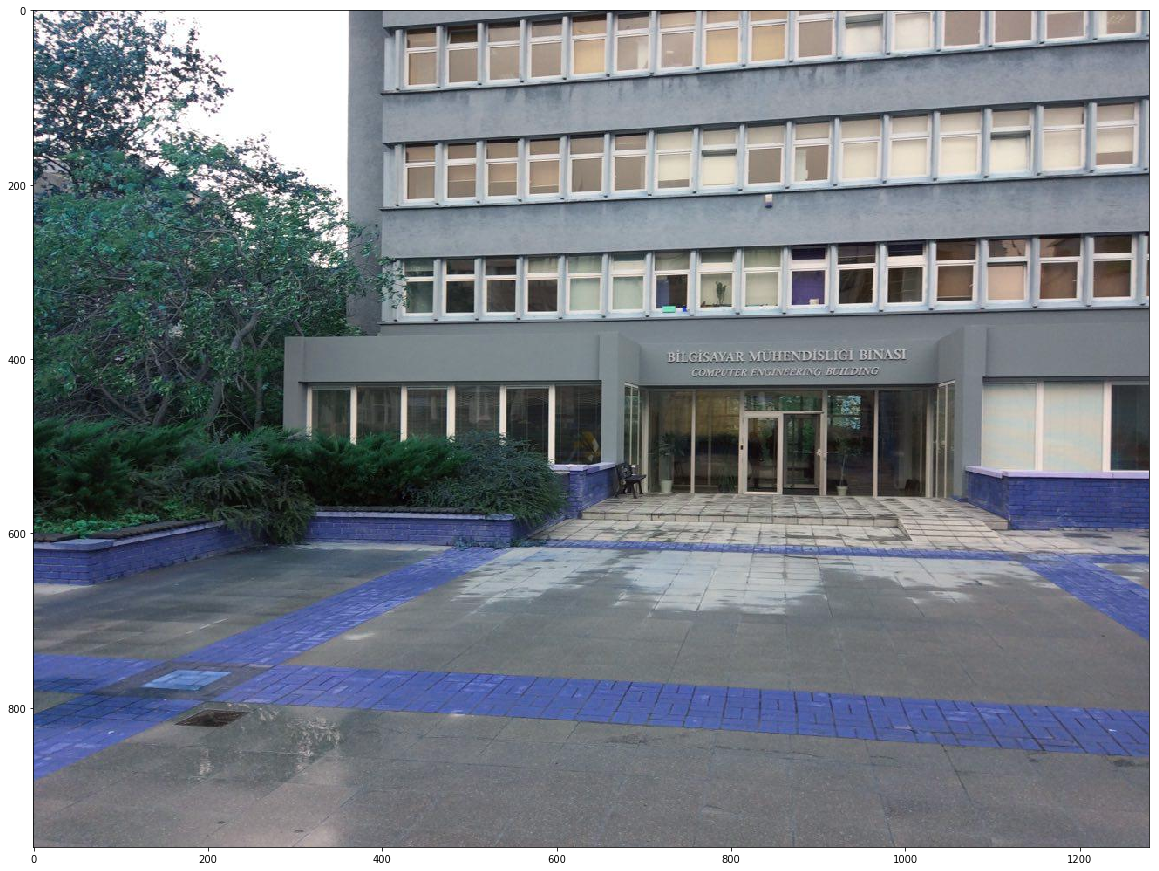

In [26]:
plt.figure(figsize=(20,20))

plt.imshow(cv2.cvtColor(image_right,cv2.COLOR_BGR2RGB))
plt.show()

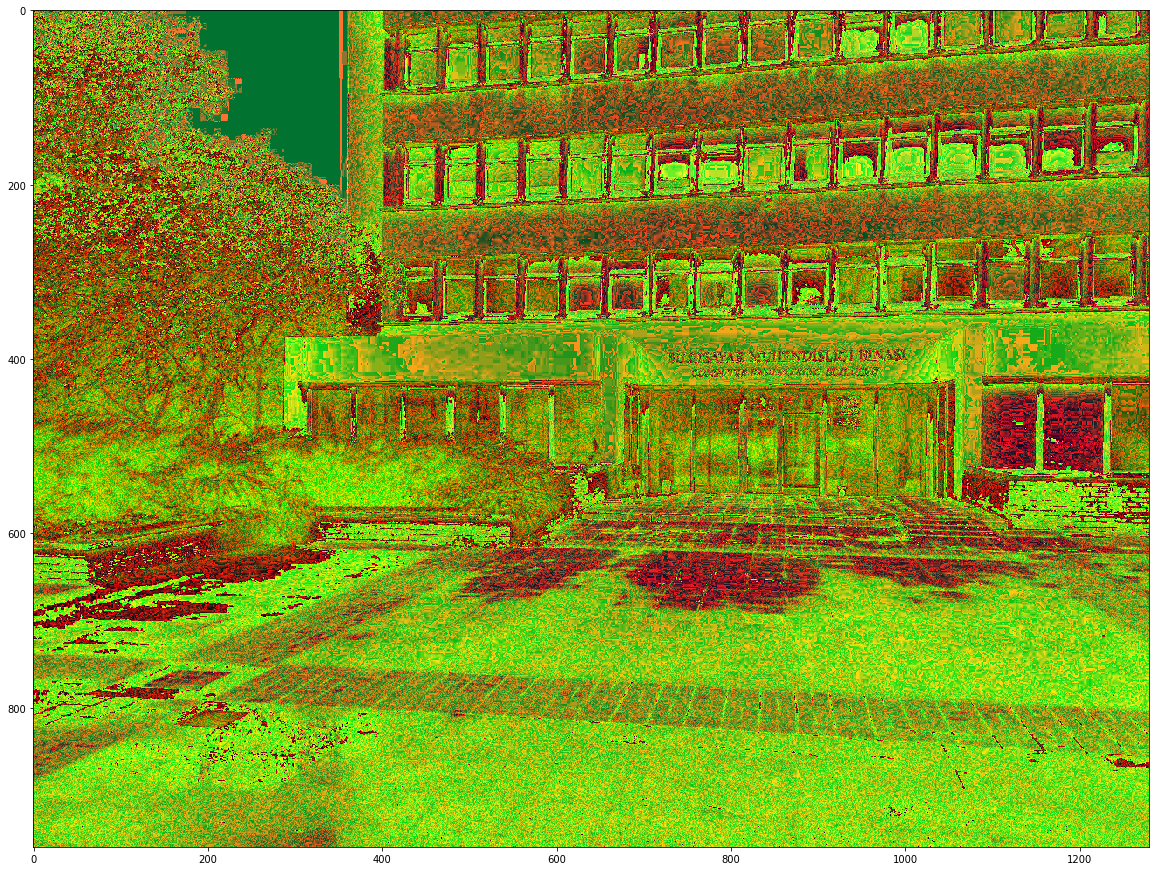

In [23]:
plt.figure(figsize=(20,20))

plt.imshow(cv2.cvtColor(np.dot(im,H).astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.show()

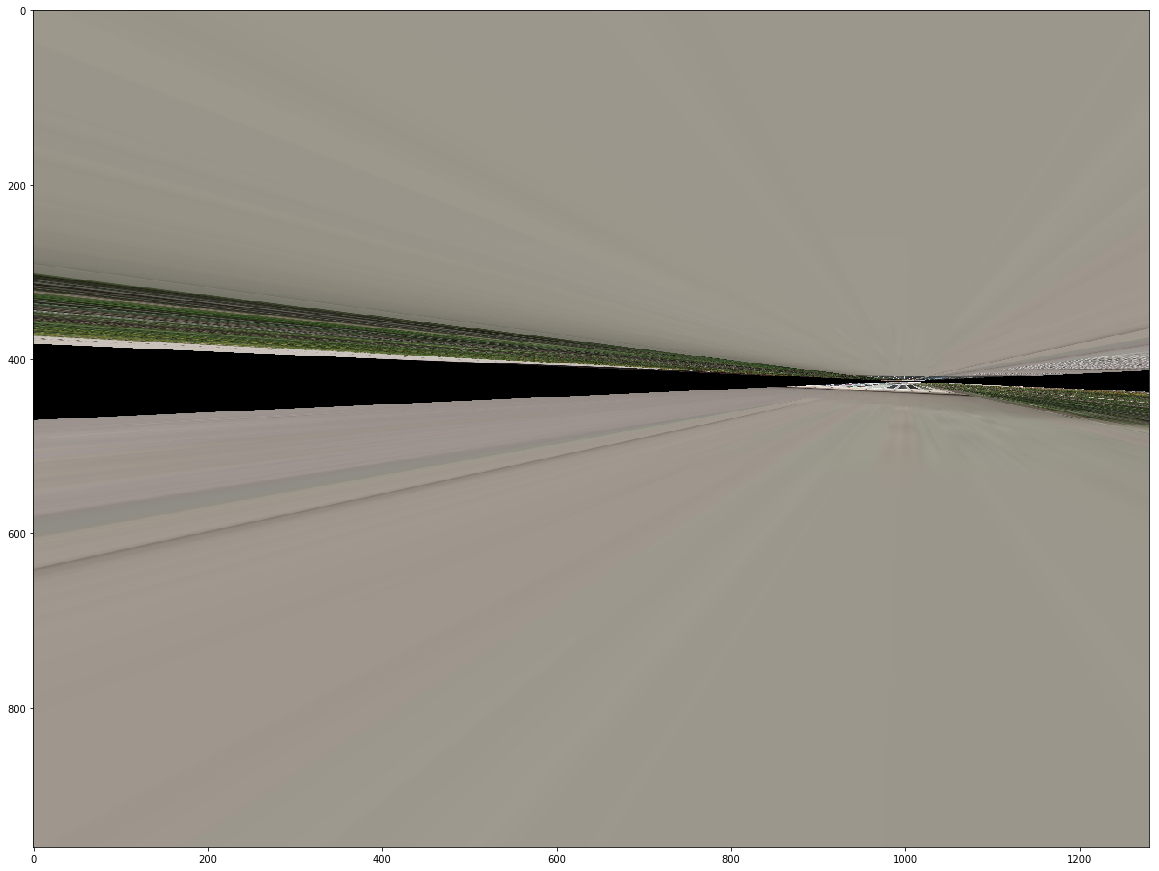

In [41]:
plt.figure(figsize=(20,20))

plt.imshow(cv2.warpPerspective(imageB, H, (imageA.shape[1],imageA.shape[0])))
plt.show()

In [40]:
res=get_stitched_image(imageA,imageB,M)
plt.figure(figsize=(20,20))
plt.imshow(res)

plt.show()

NameError: name 'get_stitched_image' is not defined